### The Problem Statement 

### Importing the necessary packages

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import  train_test_split
import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler

### Importing the Dataset

In [2]:
df = pd.read_csv("C:/Users/Sowmya Ganesh/New_Datasets/gas_turbines.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [5]:
# No null Values found

### Exploratory Data Analysis(EDA)

<Axes: >

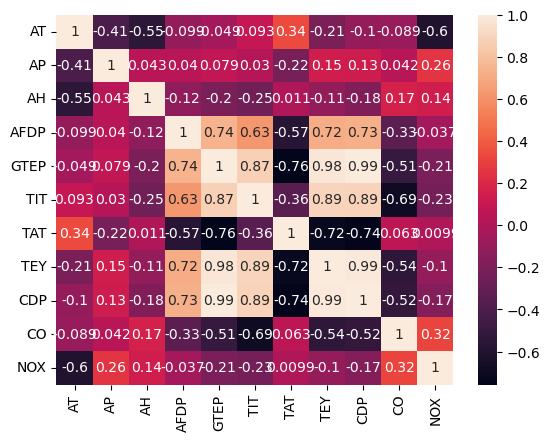

In [6]:
sns.heatmap(df[["AT","AP","AH","AFDP","GTEP","TIT","TAT","TEY","CDP","CO","NOX"]].corr(),annot = True)

In [7]:
## TEY is more correlated with AFDP,GTEP,TIT,CDP
## We consider all the columns for our Model.

In [8]:
target_column = 'TEY'
data_columns = df.columns.drop(target_column)

In [9]:
# y is our target_variable
y = df[target_column]
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [10]:
# X is our independent variable
X = df.drop(target_column,axis = 1)
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


### Scaling the Data,fitting and Transforming

In [11]:
#To Scale the Data,we import MinMaxScaler from sklearn.preprocessing
#Scaling helps in transforming the data columns to similar scale and to contribute equally to the model.
Scaler = MinMaxScaler()

In [12]:
Scaler.fit(X)

MinMaxScaler()

In [13]:
Scaled_df = Scaler.transform(X)
Scaled_df

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [14]:
data = Scaled_df

### Splitting the Data

In [15]:
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.25,random_state=0)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11279, 10)
(3760, 10)
(11279,)
(3760,)


### Multiple Linear Regression Model using Tensorflow

In [17]:
# Define the model
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)]) # Output layer for regression


In [18]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

In [19]:
#fitting the model
model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000


353/353 [==============================] - 1s 892us/step - loss: 5031.9697 - mae: 47.4713 - mse: 5031.9697
Epoch 2/1000
353/353 [==============================] - 0s 873us/step - loss: 27.7974 - mae: 4.1238 - mse: 27.7974
Epoch 3/1000
353/353 [==============================] - 0s 886us/step - loss: 19.5685 - mae: 3.5193 - mse: 19.5685
Epoch 4/1000
353/353 [==============================] - 0s 880us/step - loss: 16.2844 - mae: 3.2119 - mse: 16.2844
Epoch 5/1000
353/353 [==============================] - 0s 912us/step - loss: 13.2098 - mae: 2.8805 - mse: 13.2098
Epoch 6/1000
353/353 [==============================] - 0s 888us/step - loss: 10.3365 - mae: 2.5298 - mse: 10.3365
Epoch 7/1000
353/353 [==============================] - 0s 975us/step - loss: 7.7693 - mae: 2.1588 - mse: 7.7693
Epoch 8/1000
353/353 [==============================] - 0s 887us/step - loss: 5.9896 - mae: 1.8565 - mse: 5.9896
Epoch 9/1000
353/353 [==============================] - 0s 854us/step - loss:

353/353 [==============================] - 0s 886us/step - loss: 0.5962 - mae: 0.5646 - mse: 0.5962
Epoch 70/1000
353/353 [==============================] - 0s 887us/step - loss: 0.5900 - mae: 0.5634 - mse: 0.5900
Epoch 71/1000
353/353 [==============================] - 0s 892us/step - loss: 0.5785 - mae: 0.5554 - mse: 0.5785
Epoch 72/1000
353/353 [==============================] - 0s 949us/step - loss: 0.6254 - mae: 0.5870 - mse: 0.6254
Epoch 73/1000
353/353 [==============================] - 0s 882us/step - loss: 0.6074 - mae: 0.5738 - mse: 0.6074
Epoch 74/1000
353/353 [==============================] - 0s 899us/step - loss: 0.6077 - mae: 0.5735 - mse: 0.6077
Epoch 75/1000
353/353 [==============================] - 0s 881us/step - loss: 0.5939 - mae: 0.5666 - mse: 0.5939
Epoch 76/1000
353/353 [==============================] - 0s 873us/step - loss: 0.5795 - mae: 0.5584 - mse: 0.5795
Epoch 77/1000
353/353 [==============================] - 0s 873us/step - loss: 0.6147 - mae: 0.5789 - 

353/353 [==============================] - 0s 942us/step - loss: 0.5263 - mae: 0.5288 - mse: 0.5263
Epoch 141/1000
353/353 [==============================] - 0s 943us/step - loss: 0.5331 - mae: 0.5325 - mse: 0.5331
Epoch 142/1000
353/353 [==============================] - 0s 946us/step - loss: 0.5561 - mae: 0.5483 - mse: 0.5561
Epoch 143/1000
353/353 [==============================] - 0s 926us/step - loss: 0.5257 - mae: 0.5280 - mse: 0.5257
Epoch 144/1000
353/353 [==============================] - 0s 867us/step - loss: 0.5631 - mae: 0.5515 - mse: 0.5631
Epoch 145/1000
353/353 [==============================] - 0s 898us/step - loss: 0.5325 - mae: 0.5317 - mse: 0.5325
Epoch 146/1000
353/353 [==============================] - 0s 885us/step - loss: 0.5283 - mae: 0.5330 - mse: 0.5283
Epoch 147/1000
353/353 [==============================] - 0s 897us/step - loss: 0.5442 - mae: 0.5404 - mse: 0.5442
Epoch 148/1000
353/353 [==============================] - 0s 881us/step - loss: 0.5252 - mae: 0

353/353 [==============================] - 0s 901us/step - loss: 0.5196 - mae: 0.5269 - mse: 0.5196
Epoch 212/1000
353/353 [==============================] - 0s 879us/step - loss: 0.5259 - mae: 0.5324 - mse: 0.5259
Epoch 213/1000
353/353 [==============================] - 0s 891us/step - loss: 0.5206 - mae: 0.5249 - mse: 0.5206
Epoch 214/1000
353/353 [==============================] - 0s 866us/step - loss: 0.4993 - mae: 0.5147 - mse: 0.4993
Epoch 215/1000
353/353 [==============================] - 0s 888us/step - loss: 0.5188 - mae: 0.5269 - mse: 0.5188
Epoch 216/1000
353/353 [==============================] - 0s 878us/step - loss: 0.5389 - mae: 0.5402 - mse: 0.5389
Epoch 217/1000
353/353 [==============================] - 0s 892us/step - loss: 0.5421 - mae: 0.5391 - mse: 0.5421
Epoch 218/1000
353/353 [==============================] - 0s 831us/step - loss: 0.5124 - mae: 0.5225 - mse: 0.5124
Epoch 219/1000
353/353 [==============================] - 0s 889us/step - loss: 0.5372 - mae: 0

353/353 [==============================] - 0s 878us/step - loss: 0.5080 - mae: 0.5205 - mse: 0.5080
Epoch 283/1000
353/353 [==============================] - 0s 898us/step - loss: 0.5019 - mae: 0.5166 - mse: 0.5019
Epoch 284/1000
353/353 [==============================] - 0s 891us/step - loss: 0.5315 - mae: 0.5359 - mse: 0.5315
Epoch 285/1000
353/353 [==============================] - 0s 885us/step - loss: 0.5197 - mae: 0.5284 - mse: 0.5197
Epoch 286/1000
353/353 [==============================] - 0s 894us/step - loss: 0.4890 - mae: 0.5084 - mse: 0.4890
Epoch 287/1000
353/353 [==============================] - 0s 906us/step - loss: 0.5075 - mae: 0.5188 - mse: 0.5075
Epoch 288/1000
353/353 [==============================] - 0s 920us/step - loss: 0.5108 - mae: 0.5198 - mse: 0.5108
Epoch 289/1000
353/353 [==============================] - 0s 879us/step - loss: 0.4972 - mae: 0.5141 - mse: 0.4972
Epoch 290/1000
353/353 [==============================] - 0s 870us/step - loss: 0.5084 - mae: 0

353/353 [==============================] - 0s 886us/step - loss: 0.4419 - mae: 0.4855 - mse: 0.4419
Epoch 354/1000
353/353 [==============================] - 0s 914us/step - loss: 0.4413 - mae: 0.4843 - mse: 0.4413
Epoch 355/1000
353/353 [==============================] - 0s 891us/step - loss: 0.4259 - mae: 0.4759 - mse: 0.4259
Epoch 356/1000
353/353 [==============================] - 0s 895us/step - loss: 0.4489 - mae: 0.4909 - mse: 0.4489
Epoch 357/1000
353/353 [==============================] - 0s 854us/step - loss: 0.4280 - mae: 0.4760 - mse: 0.4280
Epoch 358/1000
353/353 [==============================] - 0s 904us/step - loss: 0.4553 - mae: 0.4950 - mse: 0.4553
Epoch 359/1000
353/353 [==============================] - 0s 900us/step - loss: 0.4559 - mae: 0.4940 - mse: 0.4559
Epoch 360/1000
353/353 [==============================] - 0s 909us/step - loss: 0.4587 - mae: 0.4960 - mse: 0.4587
Epoch 361/1000
353/353 [==============================] - 0s 896us/step - loss: 0.4453 - mae: 0

353/353 [==============================] - 0s 880us/step - loss: 0.4172 - mae: 0.4670 - mse: 0.4172
Epoch 425/1000
353/353 [==============================] - 0s 882us/step - loss: 0.4229 - mae: 0.4711 - mse: 0.4229
Epoch 426/1000
353/353 [==============================] - 0s 855us/step - loss: 0.4267 - mae: 0.4745 - mse: 0.4267
Epoch 427/1000
353/353 [==============================] - 0s 907us/step - loss: 0.4231 - mae: 0.4730 - mse: 0.4231
Epoch 428/1000
353/353 [==============================] - 0s 887us/step - loss: 0.4241 - mae: 0.4732 - mse: 0.4241
Epoch 429/1000
353/353 [==============================] - 0s 879us/step - loss: 0.4379 - mae: 0.4833 - mse: 0.4379
Epoch 430/1000
353/353 [==============================] - 0s 908us/step - loss: 0.4725 - mae: 0.5057 - mse: 0.4725
Epoch 431/1000
353/353 [==============================] - 0s 901us/step - loss: 0.4442 - mae: 0.4881 - mse: 0.4442
Epoch 432/1000
353/353 [==============================] - 0s 877us/step - loss: 0.4296 - mae: 0

353/353 [==============================] - 0s 865us/step - loss: 0.4186 - mae: 0.4693 - mse: 0.4186
Epoch 496/1000
353/353 [==============================] - 0s 950us/step - loss: 0.4410 - mae: 0.4873 - mse: 0.4410
Epoch 497/1000
353/353 [==============================] - 0s 873us/step - loss: 0.4141 - mae: 0.4661 - mse: 0.4141
Epoch 498/1000
353/353 [==============================] - 0s 864us/step - loss: 0.4223 - mae: 0.4694 - mse: 0.4223
Epoch 499/1000
353/353 [==============================] - 0s 888us/step - loss: 0.4210 - mae: 0.4710 - mse: 0.4210
Epoch 500/1000
353/353 [==============================] - 0s 901us/step - loss: 0.4107 - mae: 0.4645 - mse: 0.4107
Epoch 501/1000
353/353 [==============================] - 0s 932us/step - loss: 0.4177 - mae: 0.4698 - mse: 0.4177
Epoch 502/1000
353/353 [==============================] - 0s 895us/step - loss: 0.4362 - mae: 0.4801 - mse: 0.4362
Epoch 503/1000
353/353 [==============================] - 0s 892us/step - loss: 0.4237 - mae: 0

353/353 [==============================] - 0s 871us/step - loss: 0.4287 - mae: 0.4785 - mse: 0.4287
Epoch 567/1000
353/353 [==============================] - 0s 870us/step - loss: 0.4307 - mae: 0.4800 - mse: 0.4307
Epoch 568/1000
353/353 [==============================] - 0s 898us/step - loss: 0.4236 - mae: 0.4739 - mse: 0.4236
Epoch 569/1000
353/353 [==============================] - 0s 897us/step - loss: 0.4233 - mae: 0.4721 - mse: 0.4233
Epoch 570/1000
353/353 [==============================] - 0s 889us/step - loss: 0.4386 - mae: 0.4841 - mse: 0.4386
Epoch 571/1000
353/353 [==============================] - 0s 900us/step - loss: 0.4285 - mae: 0.4763 - mse: 0.4285
Epoch 572/1000
353/353 [==============================] - 0s 889us/step - loss: 0.4095 - mae: 0.4634 - mse: 0.4095
Epoch 573/1000
353/353 [==============================] - 0s 855us/step - loss: 0.4387 - mae: 0.4851 - mse: 0.4387
Epoch 574/1000
353/353 [==============================] - 0s 905us/step - loss: 0.4125 - mae: 0

353/353 [==============================] - 0s 925us/step - loss: 0.4176 - mae: 0.4720 - mse: 0.4176
Epoch 638/1000
353/353 [==============================] - 0s 928us/step - loss: 0.4178 - mae: 0.4707 - mse: 0.4178
Epoch 639/1000
353/353 [==============================] - 0s 893us/step - loss: 0.4170 - mae: 0.4705 - mse: 0.4170
Epoch 640/1000
353/353 [==============================] - 0s 875us/step - loss: 0.4486 - mae: 0.4958 - mse: 0.4486
Epoch 641/1000
353/353 [==============================] - 0s 887us/step - loss: 0.4051 - mae: 0.4600 - mse: 0.4051
Epoch 642/1000
353/353 [==============================] - 0s 888us/step - loss: 0.4112 - mae: 0.4650 - mse: 0.4112
Epoch 643/1000
353/353 [==============================] - 0s 886us/step - loss: 0.4289 - mae: 0.4802 - mse: 0.4289
Epoch 644/1000
353/353 [==============================] - 0s 965us/step - loss: 0.4073 - mae: 0.4628 - mse: 0.4073
Epoch 645/1000
353/353 [==============================] - 0s 882us/step - loss: 0.4061 - mae: 0

353/353 [==============================] - 0s 907us/step - loss: 0.4002 - mae: 0.4590 - mse: 0.4002
Epoch 709/1000
353/353 [==============================] - 0s 887us/step - loss: 0.4143 - mae: 0.4680 - mse: 0.4143
Epoch 710/1000
353/353 [==============================] - 0s 845us/step - loss: 0.4331 - mae: 0.4812 - mse: 0.4331
Epoch 711/1000
353/353 [==============================] - 0s 876us/step - loss: 0.4095 - mae: 0.4633 - mse: 0.4095
Epoch 712/1000
353/353 [==============================] - 0s 905us/step - loss: 0.4036 - mae: 0.4618 - mse: 0.4036
Epoch 713/1000
353/353 [==============================] - 0s 877us/step - loss: 0.4188 - mae: 0.4706 - mse: 0.4188
Epoch 714/1000
353/353 [==============================] - 0s 879us/step - loss: 0.3984 - mae: 0.4554 - mse: 0.3984
Epoch 715/1000
353/353 [==============================] - 0s 906us/step - loss: 0.4118 - mae: 0.4676 - mse: 0.4118
Epoch 716/1000
353/353 [==============================] - 0s 879us/step - loss: 0.4269 - mae: 0

353/353 [==============================] - 0s 865us/step - loss: 0.4054 - mae: 0.4637 - mse: 0.4054
Epoch 780/1000
353/353 [==============================] - 0s 867us/step - loss: 0.4068 - mae: 0.4629 - mse: 0.4068
Epoch 781/1000
353/353 [==============================] - 0s 885us/step - loss: 0.3939 - mae: 0.4527 - mse: 0.3939
Epoch 782/1000
353/353 [==============================] - 0s 869us/step - loss: 0.4077 - mae: 0.4622 - mse: 0.4077
Epoch 783/1000
353/353 [==============================] - 0s 882us/step - loss: 0.4459 - mae: 0.4926 - mse: 0.4459
Epoch 784/1000
353/353 [==============================] - 0s 866us/step - loss: 0.3981 - mae: 0.4549 - mse: 0.3981
Epoch 785/1000
353/353 [==============================] - 0s 927us/step - loss: 0.4070 - mae: 0.4645 - mse: 0.4070
Epoch 786/1000
353/353 [==============================] - 0s 874us/step - loss: 0.4266 - mae: 0.4776 - mse: 0.4266
Epoch 787/1000
353/353 [==============================] - 0s 877us/step - loss: 0.4128 - mae: 0

353/353 [==============================] - 0s 876us/step - loss: 0.4049 - mae: 0.4650 - mse: 0.4049
Epoch 851/1000
353/353 [==============================] - 0s 885us/step - loss: 0.4023 - mae: 0.4587 - mse: 0.4023
Epoch 852/1000
353/353 [==============================] - 0s 889us/step - loss: 0.3932 - mae: 0.4513 - mse: 0.3932
Epoch 853/1000
353/353 [==============================] - 0s 889us/step - loss: 0.3982 - mae: 0.4570 - mse: 0.3982
Epoch 854/1000
353/353 [==============================] - 0s 893us/step - loss: 0.3961 - mae: 0.4536 - mse: 0.3961
Epoch 855/1000
353/353 [==============================] - 0s 900us/step - loss: 0.4006 - mae: 0.4597 - mse: 0.4006
Epoch 856/1000
353/353 [==============================] - 0s 832us/step - loss: 0.3938 - mae: 0.4529 - mse: 0.3938
Epoch 857/1000
353/353 [==============================] - 0s 861us/step - loss: 0.3969 - mae: 0.4540 - mse: 0.3969
Epoch 858/1000
353/353 [==============================] - 0s 882us/step - loss: 0.4038 - mae: 0

353/353 [==============================] - 0s 882us/step - loss: 0.4009 - mae: 0.4604 - mse: 0.4009
Epoch 922/1000
353/353 [==============================] - 0s 875us/step - loss: 0.4076 - mae: 0.4637 - mse: 0.4076
Epoch 923/1000
353/353 [==============================] - 0s 890us/step - loss: 0.3927 - mae: 0.4485 - mse: 0.3927
Epoch 924/1000
353/353 [==============================] - 0s 881us/step - loss: 0.3817 - mae: 0.4422 - mse: 0.3817
Epoch 925/1000
353/353 [==============================] - 0s 874us/step - loss: 0.3966 - mae: 0.4541 - mse: 0.3966
Epoch 926/1000
353/353 [==============================] - 0s 880us/step - loss: 0.4126 - mae: 0.4689 - mse: 0.4126
Epoch 927/1000
353/353 [==============================] - 0s 867us/step - loss: 0.3904 - mae: 0.4496 - mse: 0.3904
Epoch 928/1000
353/353 [==============================] - 0s 834us/step - loss: 0.3869 - mae: 0.4477 - mse: 0.3869
Epoch 929/1000
353/353 [==============================] - 0s 867us/step - loss: 0.3937 - mae: 0

353/353 [==============================] - 0s 865us/step - loss: 0.3867 - mae: 0.4461 - mse: 0.3867
Epoch 993/1000
353/353 [==============================] - 0s 902us/step - loss: 0.3812 - mae: 0.4413 - mse: 0.3812
Epoch 994/1000
353/353 [==============================] - 0s 870us/step - loss: 0.3899 - mae: 0.4496 - mse: 0.3899
Epoch 995/1000
353/353 [==============================] - 0s 883us/step - loss: 0.3864 - mae: 0.4470 - mse: 0.3864
Epoch 996/1000
353/353 [==============================] - 0s 871us/step - loss: 0.3797 - mae: 0.4399 - mse: 0.3797
Epoch 997/1000
353/353 [==============================] - 0s 854us/step - loss: 0.3935 - mae: 0.4497 - mse: 0.3935
Epoch 998/1000
353/353 [==============================] - 0s 884us/step - loss: 0.3872 - mae: 0.4499 - mse: 0.3872
Epoch 999/1000
353/353 [==============================] - 0s 883us/step - loss: 0.3879 - mae: 0.4496 - mse: 0.3879
Epoch 1000/1000
353/353 [==============================] - 0s 866us/step - loss: 0.4045 - mae: 

In [25]:
#predicting the values for X_test
actual = model.predict(X_test)
actual

118/118 [==============================] - 0s 706us/step


array([[133.47574],
       [156.55188],
       [133.65175],
       ...,
       [109.41114],
       [135.22726],
       [155.62143]], dtype=float32)

In [26]:
#Testing the values for y_test
pred = np.array(y_test)
pred

array([134.06, 155.98, 133.77, ..., 110.15, 135.48, 156.21])

In [27]:
# Checking the accuracy of the model
accu = round(r2_score(actual,pred),2)
accu

1.0

In [28]:
#Values of MSE and RMSE
model_mse = round(mean_squared_error(actual,pred),2)
model_rmse = round(mean_squared_log_error(actual,pred),2)
print(f"The RSE value is:{model_mse}")
print(f"The RMSE valus is:{model_rmse}")

The RSE value is:0.53
The RMSE valus is:0.0


In [29]:
print(f"The Accuracy of the model is:{accu*100}%")

The Accuracy of the model is:100.0%
